# Time Series Analysis of Daily Electricity Consumption

#### Focus:
- Basic time series handling using pandas
- Convert to datetime, set datetime index
- Perform resampling and slicing
#### Objective:
- Analyze electricity consumption patterns over time using datetime-aware methods. Focus on resampling (daily, weekly, monthly), and slicing time ranges.
#### Skills Practiced:
- pd.to_datetime() conversion
- Setting datetime index
- Time-based slicing (df.loc['2020-01'], etc.)
- Resampling (resample('M'), resample('W'))
-Plotting simple trends
#### Dataset: Household Electric Power Consumption on Kaggle

#### imports

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### read cvs file path

In [98]:
path = r'C:\Users\bbuser\Desktop\data_walmart\household_power_consumption.csv'
df = pd.read_csv(path,sep=";",low_memory=False, na_values='?')
df = pd.DataFrame(df)


#### find the columns in the df

In [99]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [100]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [101]:
df.describe

<bound method NDFrame.describe of                Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_m

#### Convert to datetime

In [102]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],format='%d/%m/%Y %H:%M:%S',dayfirst=True)
df['Datetime']

0         2006-12-16 17:24:00
1         2006-12-16 17:25:00
2         2006-12-16 17:26:00
3         2006-12-16 17:27:00
4         2006-12-16 17:28:00
                  ...        
2075254   2010-11-26 20:58:00
2075255   2010-11-26 20:59:00
2075256   2010-11-26 21:00:00
2075257   2010-11-26 21:01:00
2075258   2010-11-26 21:02:00
Name: Datetime, Length: 2075259, dtype: datetime64[ns]

#### set datetime index

In [103]:
df.set_index('Datetime', inplace=True)
df.drop(columns=['Date','Time'], inplace=True)
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='Datetime', length=2075259, freq=None)

#### Time based slicing

In [104]:
# Create a longer time series
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
values = np.random.randint(10, 30, size=10)
df_ts = pd.DataFrame({'Value': values}, index=dates)
df_ts

,Value
2023-01-01,10
2023-01-02,26
2023-01-03,23
2023-01-04,10
2023-01-05,24
2023-01-06,27
2023-01-07,19
2023-01-08,12
2023-01-09,29
2023-01-10,24


##### slice by time range

In [105]:
morning_time = df.between_time('06:00', '12:00')
print(f"Morning Time data (6 AM - 12 PM): {len(morning_time)} records")

Morning Time data (6 AM - 12 PM): 520201 records


#### Date-Based Slicing

In [113]:
df.loc[('2006-12-16')]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2006-12-16 23:55:00,1.290,0.000,240.69,6.8,0.0,0.0,0.0
2006-12-16 23:56:00,2.730,0.060,239.43,11.4,0.0,1.0,0.0
2006-12-16 23:57:00,2.734,0.062,239.81,11.4,0.0,2.0,0.0


##### Slice by month

In [114]:
df.loc[('2006-12')]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2006-12-31 23:55:00,2.574,0.132,241.89,10.6,0.0,0.0,0.0
2006-12-31 23:56:00,2.576,0.132,242.06,10.6,0.0,0.0,0.0
2006-12-31 23:57:00,2.586,0.134,242.61,10.6,0.0,0.0,0.0


##### Slice by year

In [115]:
df.loc[('2006')]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2006-12-31 23:55:00,2.574,0.132,241.89,10.6,0.0,0.0,0.0
2006-12-31 23:56:00,2.576,0.132,242.06,10.6,0.0,0.0,0.0
2006-12-31 23:57:00,2.586,0.134,242.61,10.6,0.0,0.0,0.0


#### Perform resampling and slicing

##### Resampling daily frequency, with the daily average

In [109]:
df_daily_average = df_ts.resample('D').mean()
df_daily_average

,Value
2023-01-01,10.0
2023-01-02,26.0
2023-01-03,23.0
2023-01-04,10.0
2023-01-05,24.0
2023-01-06,27.0
2023-01-07,19.0
2023-01-08,12.0
2023-01-09,29.0
2023-01-10,24.0


##### Resampling weekly frequency, with the weekly average

In [110]:
df_weekly_sum = df_ts.resample('W').mean()
print("\nWeekly average:\n", df_weekly_sum)


Weekly average:
                 Value
2023-01-01  10.000000
2023-01-08  20.142857
2023-01-15  26.500000


##### Resampling to montly frequency, with the month average

In [111]:
df_monthly_mean = df_ts.resample('ME').mean()
df_monthly_mean

,Value
2023-01-31,20.4


### Data Visualization Plotting

<Figure size 2000x1500 with 0 Axes>

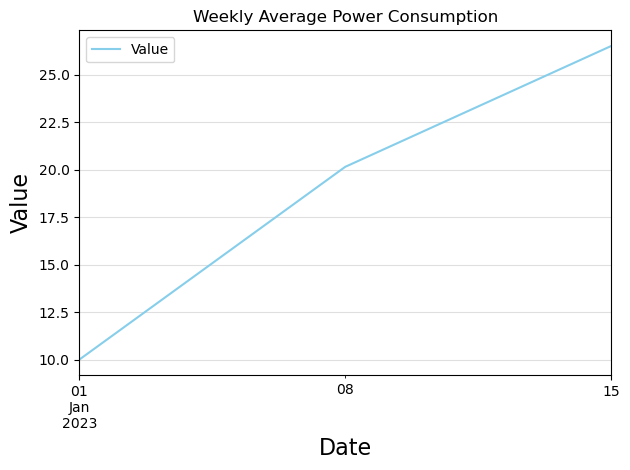

In [ ]:
plt.figure(figsize=(20, 15))
df_weekly_sum.plot(title='Weekly Average Power Consumption', color='skyblue')
plt.grid(True, alpha=0.4)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.tight_layout()
plt.show()
